In [1]:
# Observable trends:
#1 There's a very strong coorelation with latitude and Max Temp in the Northern Hemisphere. The further away from the equator, the lower the max temp will be.
#2 The coorelation with latitude and Max Temp in the Southern Hemisphere is also strong but not as strong as in the north.
#3 When comparing the northern hemisphere in latitude and Wind Speed, there's almost 0 coorelation

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


from api_keys import weather_api_key


from citipy import citipy

output_data_file = "output_data/cities.csv"


lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_lngs = []
cities = []


lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    if city not in cities:
        cities.append(city)


len(cities)

606

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f01ae8e2b2aa90d85a0cd30b1e8b51ae"

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
forrecord_count = 1
set_count = 1

for city in cities:
    if (forrecord_count >=50):
        set_count += 1
        forrecord_count = 0
    try:        
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        print("Processing Record %s of Set %s | %s" % (forrecord_count, set_count, city))    

        record_count += 1
        forrecord_count += 1
        

    except:
        print("City not found. Skipping...")
    continue
    
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | araouane
Processing Record 2 of Set 1 | leningradskiy
Processing Record 3 of Set 1 | kruisfontein
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | carballo
Processing Record 7 of Set 1 | kargil
Processing Record 8 of Set 1 | ahuimanu
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | namibe
Processing Record 13 of Set 1 | arlit
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | baykit
Processing Record 16 of Set 1 | half moon bay
Processing Record 17 of Set 1 | kavaratti
Processing Record 18 of Set 1 | boa vista
Processing Record 19 of Set 1 | lerwick
Processing Record 20 of Set 1 | vestmannaeyjar
Processing Record 21 of Set 1 | bandarbeyla
Processing Record 22 of Set 1 | west lorne
Processing Record 23 of Set 

Processing Record 41 of Set 4 | lermontovka
Processing Record 42 of Set 4 | luderitz
Processing Record 43 of Set 4 | boguchany
Processing Record 44 of Set 4 | garden city
Processing Record 45 of Set 4 | peniche
Processing Record 46 of Set 4 | atambua
City not found. Skipping...
Processing Record 47 of Set 4 | reconquista
Processing Record 48 of Set 4 | lompoc
Processing Record 49 of Set 4 | emba
Processing Record 0 of Set 5 | henderson
Processing Record 1 of Set 5 | muros
Processing Record 2 of Set 5 | airai
Processing Record 3 of Set 5 | boralday
Processing Record 4 of Set 5 | taybad
Processing Record 5 of Set 5 | beyneu
Processing Record 6 of Set 5 | saskylakh
Processing Record 7 of Set 5 | kantunilkin
Processing Record 8 of Set 5 | hastings
Processing Record 9 of Set 5 | vila franca do campo
Processing Record 10 of Set 5 | torbay
Processing Record 11 of Set 5 | bredasdorp
Processing Record 12 of Set 5 | moree
City not found. Skipping...
Processing Record 13 of Set 5 | thunder bay
Pr

City not found. Skipping...
City not found. Skipping...
Processing Record 27 of Set 8 | touros
Processing Record 28 of Set 8 | hohhot
Processing Record 29 of Set 8 | cervo
Processing Record 30 of Set 8 | srikakulam
Processing Record 31 of Set 8 | coahuayana
Processing Record 32 of Set 8 | salinopolis
Processing Record 33 of Set 8 | arkhara
Processing Record 34 of Set 8 | tambacounda
Processing Record 35 of Set 8 | sirajganj
Processing Record 36 of Set 8 | alta floresta
Processing Record 37 of Set 8 | athabasca
Processing Record 38 of Set 8 | conde
Processing Record 39 of Set 8 | cabo san lucas
Processing Record 40 of Set 8 | beringovskiy
Processing Record 41 of Set 8 | sao felix do xingu
Processing Record 42 of Set 8 | corigliano calabro
Processing Record 43 of Set 8 | safaga
Processing Record 44 of Set 8 | sechura
Processing Record 45 of Set 8 | roebourne
City not found. Skipping...
Processing Record 46 of Set 8 | fortuna
Processing Record 47 of Set 8 | malkara
Processing Record 48 of

In [12]:
weather_data = {
    "City": city_name,
    "Lat":lat, 
    "Lng":lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date, 
    }


weather_df = pd.DataFrame(weather_data)

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Araouane,18.90,-3.53,87.10,13,0,8.01,ML,1603667539
1,Leningradskiy,69.38,178.42,24.51,90,68,5.41,RU,1603667539
2,Kruisfontein,-34.00,24.73,61.00,96,100,1.01,ZA,1603667539
3,Hobart,-42.88,147.33,57.00,54,75,11.41,AU,1603667540
4,Bluff,-46.60,168.33,53.01,63,71,5.99,NZ,1603667370
...,...,...,...,...,...,...,...,...,...
550,Aktau,43.65,51.20,55.40,93,90,2.24,KZ,1603667626
551,Palembang,-2.92,104.75,73.40,100,20,3.89,ID,1603667626
552,Gari,59.43,62.35,25.16,98,100,2.75,RU,1603667626
553,Toamasina,-18.17,49.38,69.80,94,40,2.95,MG,1603667626


In [13]:
weather_df.to_csv('Output/weather_data.csv', index_label='City_ID')

In [15]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,20.720252,14.431712,58.181441,74.659459,56.445045,7.916432,1.603668e+09
std,33.433355,89.972894,20.668300,19.449956,38.121719,5.712101,8.543633e+01
min,-54.800000,-175.200000,-2.970000,13.000000,0.000000,0.250000,1.603667e+09
25%,-7.950000,-67.410000,44.010000,66.000000,20.000000,3.645000,1.603668e+09
50%,26.770000,20.920000,63.000000,79.000000,71.000000,6.780000,1.603668e+09
75%,49.270000,92.400000,75.200000,88.000000,90.000000,10.290000,1.603668e+09
max,78.220000,179.320000,95.000000,100.000000,100.000000,47.200000,1.603668e+09


In [16]:
humid_city = weather_df[(weather_df['Humidity'] > 100)].index

humid_city

Int64Index([], dtype='int64')

In [19]:
scrubbed_city_data = weather_df.drop(humid_city, inplace=False)
scrubbed_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Araouane,18.90,-3.53,87.10,13,0,8.01,ML,1603667539
1,Leningradskiy,69.38,178.42,24.51,90,68,5.41,RU,1603667539
2,Kruisfontein,-34.00,24.73,61.00,96,100,1.01,ZA,1603667539
3,Hobart,-42.88,147.33,57.00,54,75,11.41,AU,1603667540
4,Bluff,-46.60,168.33,53.01,63,71,5.99,NZ,1603667370


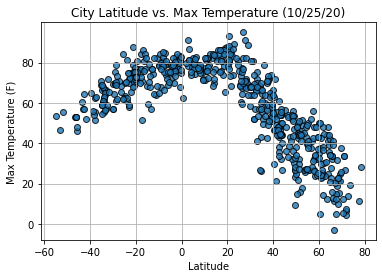

In [22]:
plt.scatter(lat,
            max_temp,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('Output/Fig1.png')

plt.show()

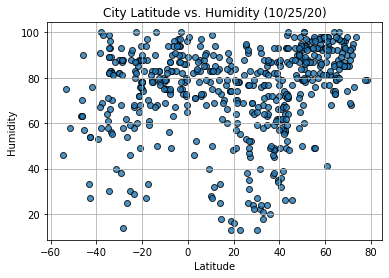

In [25]:
plt.scatter(lat,
            humidity,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%x'))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('Output/Fig2.png')

plt.show()

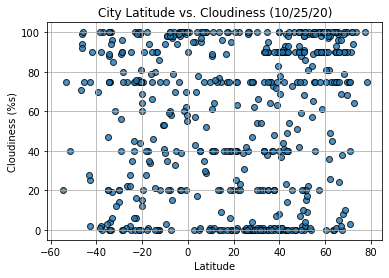

In [26]:
plt.scatter(lat,
            cloudiness,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%x'))
plt.ylabel('Cloudiness (%s)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('Output/Fig3.png')

plt.show()

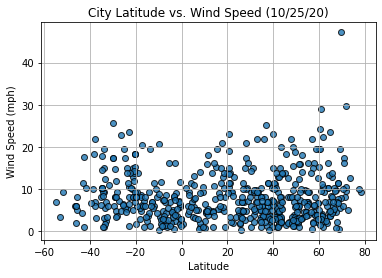

In [27]:
plt.scatter(lat,
            wind_speed,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('Output/Fig4.png')

plt.show()

In [73]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    plt.plot(x_values, y_values, 'o')
    m, b = np.polyfit(x_values, y_values, 1)
    plt.plot(x_values, m*x_values+b, color='red')
    line_eq = 'y = ' + str(round(m,2)) + 'x + ' + str(round(b,2))
    plt.scatter(x_values, y_values)
    
#    plt.plot(x_values,regress_values,'r-')
    plt.annotate(line_eq,text_coordinates,fontsize=15,color='red')
    plt.xlabel('Latitude')
    plt.ylabel(title)
    axes = plt.gca()
    axes.set_ylim([0,100])
    
    print(f'The r-value is: {rvalue**2}')
    
    plt.show()
    
    

The r-value is: 0.7626639781346103


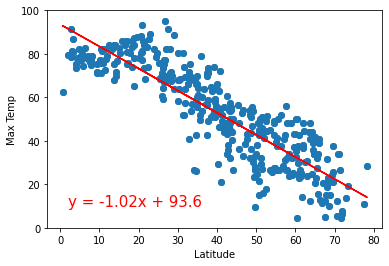

In [75]:
northern_hemi_df = scrubbed_city_data.loc[(scrubbed_city_data['Lat'] >= 0)]
southern_hemi_df = scrubbed_city_data.loc[(scrubbed_city_data['Lat'] < 0)]

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Max Temp', (2,10))

The r-value is: 0.5563931719890753


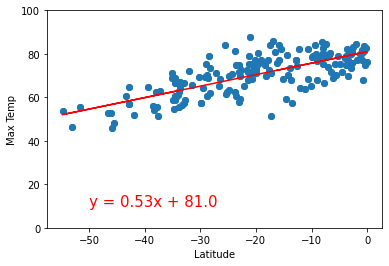

In [77]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Max Temp', (-50,10))

The r-value is: 0.12028220345995369


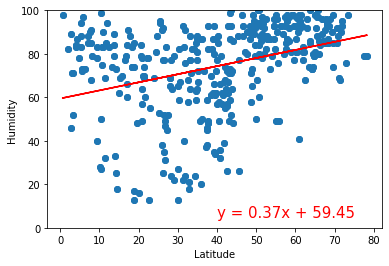

In [79]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, 'Humidity', (40,5))

The r-value is: 0.08669837395799375


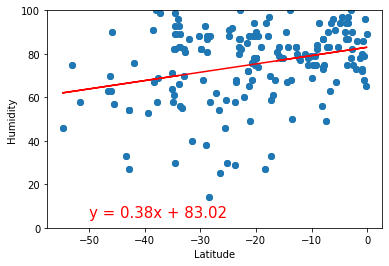

In [81]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, 'Humidity', (-50,5))

The r-value is: 0.07505921274008653


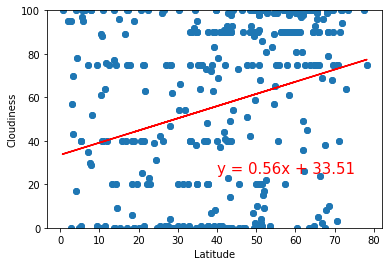

In [83]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,25))

The r-value is: 0.021474046939790003


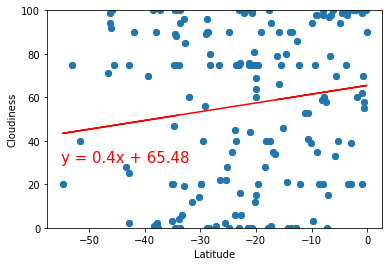

In [86]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, 'Cloudiness', (-55,30))

The r-value is: 0.007027338546734601


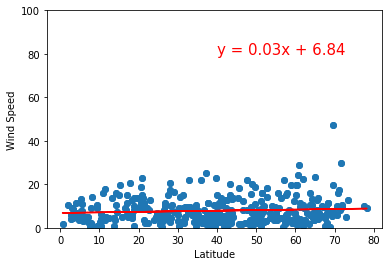

In [88]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,80))

The r-value is: 0.047468755943143114


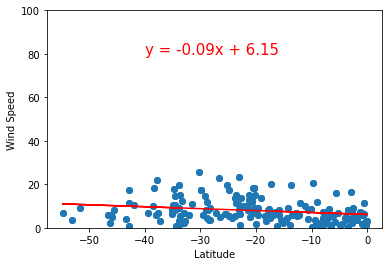

In [90]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Wind Speed', (-40,80))